In [1]:
import numpy as np
import matplotlib.pyplot as plt

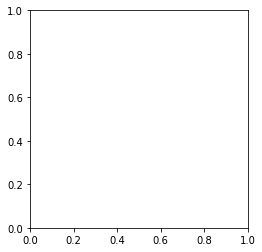

In [19]:
num_data = 30
random_seed = 0
np.set_printoptions(10)
np.random.seed(random_seed)
plt.axes().set_aspect('equal')


x = np.linspace(-np.pi, +np.pi, num_data)
x_star = np.linspace(-1.5 * np.pi, + 1.5 * np.pi, num_data)
y = np.sin(x) * 2
y += np.random.normal(scale=0.1, size=y.shape)

<ipython-input-20-ba812cc6a000>:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


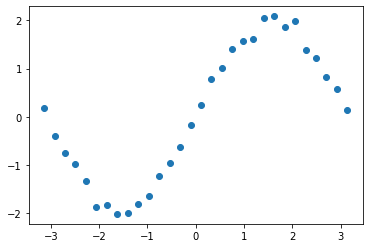

In [20]:
plt.scatter(x, y)
plt.axes().set_aspect('equal')

plt.show()

In [21]:
X = np.concatenate((x[:, np.newaxis], np.ones((num_data, 1))), axis=1)
X_star = np.concatenate((x_star[:, np.newaxis], np.ones((num_data, 1))), axis=1)
print(X[:5])
print(X_star[:5])

[[-3.1415926536  1.          ]
 [-2.9249310913  1.          ]
 [-2.708269529   1.          ]
 [-2.4916079666  1.          ]
 [-2.2749464043  1.          ]]
[[-4.7123889804  1.          ]
 [-4.3873966369  1.          ]
 [-4.0624042934  1.          ]
 [-3.73741195    1.          ]
 [-3.4124196065  1.          ]]


## 線形回帰

In [22]:
a = np.linalg.inv(X.T @ X) @ X.T @ y

<ipython-input-24-bb80363e28d3>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


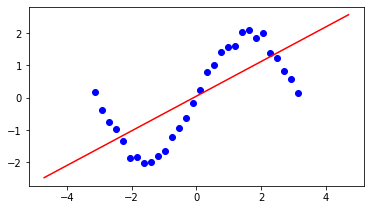

In [24]:
y_hat = X_star @ a

plt.scatter(x, y, label="train", c="b")
plt.plot(x_star, y_hat, label="pred", c="r")
plt.axes().set_aspect('equal')
plt.show()

## 局所線形回帰

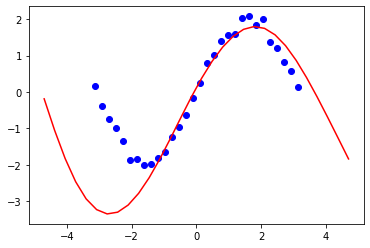

In [30]:
σ = 0.8
k = lambda x1, x2: np.exp(- np.linalg.norm(x1 - x2)**2 / (2 * σ**2))

y_hat = np.empty(shape=(X_star.shape[0], 1))
for i, x_star in enumerate(X_star):
    W = np.diag(np.array([k(x_star, x_i) for x_i in x]))
    a = np.linalg.inv(X.T @ W @ X) @ X.T @ W @ y
    y_hat[i] = x_star.T @ a
    
    
plt.scatter(x, y, label="train", c="b")
plt.plot(X_star[:, 0], y_hat, label="pred", c="r")
plt.show()